In [2]:
import pandas as pd
import json
df = pd.read_csv('country_data.csv')
print(df.head())

c:\Users\User\anaconda3\envs\pytorch-env\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


  cntry  stflife  hinctnta  ppltrst  sclmeet  health  eduyrs  uempla  marsts  \
0    AT      8.0       6.0      5.0      4.0       3    12.0       0     NaN   
1    AT      9.0       1.0     10.0      7.0       2    14.0       0     6.0   
2    AT     10.0       5.0      6.0      4.0       1    16.0       0     NaN   
3    AT      7.0       2.0      6.0      6.0       3    14.0       0     4.0   
4    AT      9.0       NaN      6.0      5.0       2    12.0       0     NaN   

   agea  ...  ipadvnta  ipbhprpa  iprspota  iplylfra  impenva  imptrada  \
0  65.0  ...       5.0       2.0       2.0       2.0      2.0       3.0   
1  21.0  ...       4.0       2.0       4.0       1.0      1.0       4.0   
2  53.0  ...       4.0       3.0       3.0       1.0      1.0       3.0   
3  78.0  ...       4.0       3.0       3.0       2.0      2.0       2.0   
4  64.0  ...       4.0       2.0       2.0       2.0      2.0       2.0   

   impfuna  respc19a  symtc19  symtnc19  
0      3.0       1.0      

In [10]:
df["wrhpp_01"] = (df["wrhpp"] - 1) / 3
df["enjlf_01"] = (df["enjlf"] - 1) / 3
df["happy_01"] = df["happy"] / 10
df["ctrlife_01"] = df["ctrlife"] / 10

df["subjective_wellbeing"] = df[["happy_01", "ctrlife_01", "wrhpp_01", "enjlf_01"]].mean(axis=1)
df["subjective_wellbeing"]


0        0.733333
1        0.841667
2        0.783333
3        0.541667
4        0.783333
           ...   
40151    0.550000
40152    0.516667
40153    1.000000
40154    0.708333
40155    0.600000
Name: subjective_wellbeing, Length: 40156, dtype: float64

In [81]:
inst_vars = ["trstplt", "trstprt", "trstprl", "trstlgl", "trstplc", "trstun", "trstep"]
for var in inst_vars:
    df[f"{var}_01"] = df[var] / 10

df["institutional_trust"] = df[[f"{var}_01" for var in inst_vars]].mean(axis=1)


In [82]:
inst_vars = ["stfgov", "stfdem", "stfhlth", "stfedu", "stfeco"]
for var in inst_vars:
    df[f"{var}_01"] = df[var] / 10

df["institutional_satisfaction"] = df[[f"{var}_01" for var in inst_vars]].mean(axis=1)


In [12]:
df['inprdsc'].value_counts()

inprdsc
4.0    10114
3.0     9554
2.0     8607
1.0     6298
5.0     1991
0.0     1811
6.0     1564
Name: count, dtype: int64

In [83]:
df["pplfair_01"] = df["pplfair"] / 10
df["ppltrst_01"] = df["ppltrst"] / 10
df["pplhlp_01"] = df["pplhlp"] / 10

df["social_trust"] = df[[
    "pplfair_01", "ppltrst_01", "pplhlp_01"
]].mean(axis=1)


In [84]:
inprdsc_min, inprdsc_max = df["inprdsc"].min(), df["inprdsc"].max()


# sclmeet from 1–7 to 0–1
df["inprdsc_01"] = (df["inprdsc"] - 1) / 5
df["sclmeet_01"] = (df["sclmeet"] - 1) / 6
df["sclact_01"] = (df["sclact"] - 1) / 4

df['social_network'] = df[["inprdsc_01", "sclmeet_01", "sclact_01"]].mean(axis=1)


In [14]:
distress_vars = ["fltdpr", "fltsd", "fltlnl", "flteeff", "cldgng", "slprl"]
for var in distress_vars:
    df[f"{var}_01"] = (df[var] - 1) / 3

df["mental_distress"] = df[[f"{var}_01" for var in distress_vars]].mean(axis=1)


In [87]:
df["health_01"] = (df["health"] - 1) / 4
df["hlthhmp_01"] = (3 - df["hlthhmp"]) / 2

df["health_limitations"] = df[["health_01", "hlthhmp_01"]].mean(axis=1)


In [85]:
# Rescale 1–4 → 0–10
for col in ["fltdpr", "fltsd", "fltlnl", "flteeff", "cldgng", "slprl"]:
    df[f"{col}_10"] = (df[col] - 1) * (10 / 3)

# Build theme score
df["emotional_difficulty"] = df[[f"{col}_10" for col in ["fltdpr", "fltsd", "fltlnl", "flteeff", "cldgng", "slprl"]]].mean(axis=1)

df["emotional_difficulty"]

0        0.000000
1        4.444444
2        2.777778
3        3.888889
4        0.000000
           ...   
40151    5.000000
40152    2.777778
40153    1.111111
40154    0.000000
40155    0.555556
Name: emotional_difficulty, Length: 40156, dtype: float64

In [88]:
# Variables already use: 1 = has condition, 0 = no condition
# We want 1 = no condition (good health), 0 = has condition

chronic_vars = [
    "hltprca", "hltprdi", "hltprhb", "hltprhc", "hltprpf",
    "hltprpa", "hltprsh", "hltprsd", "hltprsc", "hltprbn", "hltpral"
]

# Reverse so higher = better health
for var in chronic_vars:
    df[f"{var}_01"] = 1 - df[var]

# Combine
df["chronic_health_conditions"] = df[[f"{var}_01" for var in chronic_vars]].mean(axis=1)


In [89]:
df["hinctnta_01"] = df["hinctnta"] / 10
df["fnsdfml_01"] = (df["fnsdfml"] - 1) / 4
df["uempla_01"] = 1 - df["uempla"]  # already 0 or 1

df["wkhtot_01"] = df["wkhtot"] / df["wkhtot"].max()
df["wkhct_01"] = df["wkhct"] / df["wkhct"].max()
df["wkdcorga_01"] = (df["wkdcorga"] - 1) / 10
df["pdwrk_01"] = df["pdwrk"]

mainact_scale = {
    1: 1.00,
    2: 0.85,
    3: 0.35,
    4: 0.25,
    5: 0.10,
    6: 0.50,
    7: 0.60,
    8: 0.45,
    9: 0.30
}

df["mainact_01"] = df["mainact"].map(mainact_scale)


economic_vars = [
    "hinctnta_01", "fnsdfml_01", "wkhtot_01", "wkhct_01", "uempla_01",
    "wkdcorga_01", "pdwrk_01", "mainact_01"
]

df["economic_status"] = df[economic_vars].mean(axis=1)
df["economic_conditions"] = df[["hinctnta_01", "fnsdfml_01", "uempla_01"]].mean(axis=1)


In [7]:
# Rescale 1–4 → 0–1
for col in ["fltdpr", "fltsd", "fltlnl", "flteeff", "cldgng", "slprl"]:
    df[f"{col}_01"] = (df[col] - 1) / 3

# Build theme score
df["mental_distress_01"] = df[[f"{col}_01" for col in ["fltdpr", "fltsd", "fltlnl", "flteeff", "cldgng", "slprl"]]].mean(axis=1)
df["mental_distress_01"]


0        0.000000
1        0.444444
2        0.277778
3        0.388889
4        0.000000
           ...   
40151    0.500000
40152    0.277778
40153    0.111111
40154    0.000000
40155    0.055556
Name: mental_distress_01, Length: 40156, dtype: float64

In [8]:
df[["mental_distress_10", "mental_distress_01"]].describe()


,mental_distress_10,mental_distress_01
count,40104.000000,40104.000000
mean,1.888502,0.188850
std,1.714582,0.171458
min,0.000000,0.000000
25%,0.555556,0.055556
50%,1.666667,0.166667
75%,2.777778,0.277778
max,10.000000,1.000000


In [92]:
df["vote_01"] = df["vote"].map({1: 1.0, 2: 0.0})
df["polintr_01"] = (4 - df["polintr"]) / 3
df["actrolga_01"] = df["actrolga"] / 5
df["iorgact_01"] = df["iorgact"] / 10
df["contplt_01"] = df["contplt"].map({1: 1.0, 2: 0.0})
df["pstplonl_01"] = df["pstplonl"].map({1: 1.0, 2: 0.0})
df['sgnptit_01'] = df['sgnptit'].map({1: 1.0, 2: 0.0})
df['donprty_01'] = df['donprty'].map({1: 1.0, 2: 0.0})
df['pbldmna_01'] = df['pbldmna'].map({1: 1.0, 2: 0.0})

df["civic_engagement"] = df[[
    "vote_01",
    "polintr_01",
    "actrolga_01",
    "iorgact_01",
    "contplt_01",
    "pstplonl_01",
    "sgnptit_01",
    "donprty_01",
    "pbldmna_01"
]].mean(axis=1)





In [93]:
# aesfdrk: Feeling of safety walking alone after dark (1 = Very safe → 4 = Very unsafe)
df["aesfdrk_01"] = (4 - df["aesfdrk"]) / 3  # Reversed so that higher = safer

# crmvct: Victim of burglary/assault in last 5 years (0 = No, 1 = Yes)
df["crmvct_01"] = 1 - df["crmvct"]  # Reversed so that 1 = hasn't been a victim (i.e., safer)

# impsafea: Important to live in secure and safe surroundings (0–10 scale)
df["impsafea_01"] = (5- df["impsafea"] )/ 4  # Higher = more value placed on safety

# Combine into safety_security theme score
df["safety_security"] = df[["aesfdrk_01", "crmvct_01", "impsafea_01"]].mean(axis=1)


In [94]:
# psppipla: Political system allows people to have influence (0–10 scale)
df["psppipla_01"] = df["psppipla"] / 5

# psppsgva: Political system allows people to have a say in what government does (0–10 scale)
df["psppsgva_01"] = df["psppsgva"] / 5

# cptppola: Confidence in own ability to participate in politics (0–10 scale)
df["cptppola_01"] = df["cptppola"] /5

# Combine into political_efficacy theme score
df["political_efficacy"] = df[["psppipla_01", "psppsgva_01", "cptppola_01"]].mean(axis=1)


In [97]:
# All these are binary variables indicating whether the respondent identifies as a member of a discriminated group for that reason
# 1 = yes (experienced), 0 = no (not experienced)
# Any other value (e.g. 7, 8, 9, or special codes) should already be handled as NaN
df["dscrgrp_01"] = df["dscrgrp"].replace({1: 1, 2: 0})
discrimination_vars = [
    "dscrgrp_01", "dscrntn", "dscrrce", "dscrage", "dscrsex",
    "dscrgnd", "dscretn"]

# No scaling needed — already 0 or 1
df["discrimination"] = df[discrimination_vars].mean(axis=1)


In [98]:
# Scale eduyrs (years of full-time education)
df["eduyrs_01"] = df["eduyrs"] / df["eduyrs"].max()

# Scale eisced (education level: 1–7)
df["eisced_01"] = (df["eisced"] - 1) / 6

# Combine into theme score
df["education"] = df[["eduyrs_01", "eisced_01"]].mean(axis=1)


C:\Users\User\AppData\Local\Temp\ipykernel_11804\1976618267.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["education"] = df[["eduyrs_01", "eisced_01"]].mean(axis=1)


In [99]:
# Age: normalise age to 0–1 scale
df["agea_01"] = df["agea"] / df["agea"].max()

# Gender: binary variable (0 = Male, 1 = Female)
df["gndr_01"] = df["gndr"].map({1: 0, 2: 1})



# Combine into demographic theme
df["demographics"] = df[["agea_01", "gndr_01"]].mean(axis=1)


C:\Users\User\AppData\Local\Temp\ipykernel_11804\1796226061.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["agea_01"] = df["agea"] / df["agea"].max()
C:\Users\User\AppData\Local\Temp\ipykernel_11804\1796226061.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["gndr_01"] = df["gndr"].map({1: 0, 2: 1})
C:\Users\User\AppData\Local\Temp\ipykernel_11804\1796226061.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

In [102]:
# Reverse and scale all values theme variables
df["ipgdtima_01"] = (6 - df["ipgdtima"]) / 5
df["iplylfra_01"] = (6 - df["iplylfra"]) / 5
df["ipudrsta_01"] = (6 - df["ipudrsta"]) / 5
df["iphlppla_01"] = (6 - df["iphlppla"]) / 5
df["ipcrtiva_01"] = (6 - df["ipcrtiva"]) / 5
df["impfreea_01"] = (6 - df["impfreea"]) / 5
df["impfuna_01"] = (6 - df["impfuna"]) / 5
df["sothnds_01"] = (6 - df["sothnds"]) / 5

df["impenva_01"] = (6 - df["impenva"]) / 5
df["ipeqopta_01"] = (6 - df["ipeqopta"]) / 5
df["ipbhprpa_01"] = (6 - df["ipbhprpa"]) / 5
df["ipmodsta_01"] = (6 - df["ipmodsta"]) / 5
df["ipshabta_01"] = (6 - df["ipshabta"]) / 5
df["imptrada_01"] = (6 - df["imptrada"]) / 5
df["ipfrulea_01"] = (6 - df["ipfrulea"]) / 5
df["ipstrgva_01"] = (6 - df["ipstrgva"]) / 5
df["iprspota_01"] = (6 - df["iprspota"]) / 5

# Compute overall values theme score
df["values"] = df[
    [
        "ipgdtima_01", "iplylfra_01", "ipudrsta_01", "iphlppla_01",
        "ipcrtiva_01", "impfreea_01", "impfuna_01", "sothnds_01", "impenva_01", "ipeqopta_01", "ipbhprpa_01",
        "ipmodsta_01", "ipshabta_01", "imptrada_01", "ipfrulea_01",
        "ipstrgva_01", "iprspota_01"
    ]
].mean(axis=1)


C:\Users\User\AppData\Local\Temp\ipykernel_11804\2757688345.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["values"] = df[


In [22]:
available = [v for v in key_variables if v in df.columns]
desc = df[available].describe().T
desc["missing_values"] = df[available].isnull().sum()
desc["% missing"] = 100 * desc["missing_values"] / len(df)

# Round for readability
desc = desc.round(2)

# View summary
print(desc)

            count  mean   std  min  25%  50%  75%   max  missing_values  \
stflife   39863.0  7.22  2.01  0.0  6.0  8.0  9.0  10.0             293   
hinctnta  31726.0  5.57  2.70  1.0  3.0  6.0  8.0  10.0            8430   
ppltrst   40057.0  5.16  2.41  0.0  3.0  5.0  7.0  10.0              99   
sclmeet   40081.0  4.79  1.57  1.0  4.0  5.0  6.0   7.0              75   
health    40156.0  2.15  0.93  1.0  1.0  2.0  3.0   9.0               0   
...           ...   ...   ...  ...  ...  ...  ...   ...             ...   
imptrada  39471.0  2.72  1.37  1.0  2.0  2.0  4.0   6.0             685   
impfuna   39449.0  2.90  1.30  1.0  2.0  3.0  4.0   6.0             707   
respc19a  39743.0  1.77  0.94  1.0  1.0  1.0  3.0   3.0             413   
symtc19   25424.0  1.68  0.47  1.0  1.0  2.0  2.0   2.0           14732   
symtnc19   8013.0  1.66  0.47  1.0  1.0  2.0  2.0   2.0           32143   

          % missing  
stflife        0.73  
hinctnta      20.99  
ppltrst        0.25  
sclmeet    

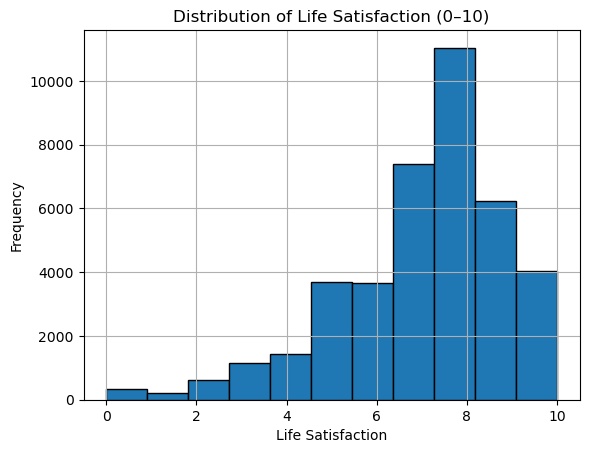

In [23]:
import matplotlib.pyplot as plt
df["stflife"].hist(bins=11, edgecolor='black')
plt.title("Distribution of Life Satisfaction (0–10)")
plt.xlabel("Life Satisfaction")
plt.ylabel("Frequency")
plt.show()


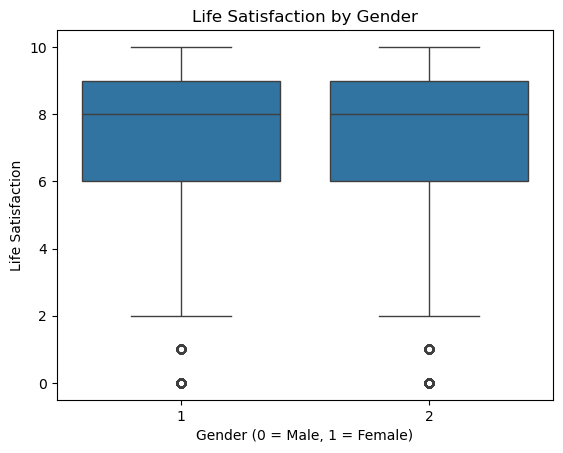

In [24]:
import seaborn as sns
sns.boxplot(x="gndr", y="stflife", data=df)
plt.title("Life Satisfaction by Gender")
plt.xlabel("Gender (0 = Male, 1 = Female)")
plt.ylabel("Life Satisfaction")
plt.show()


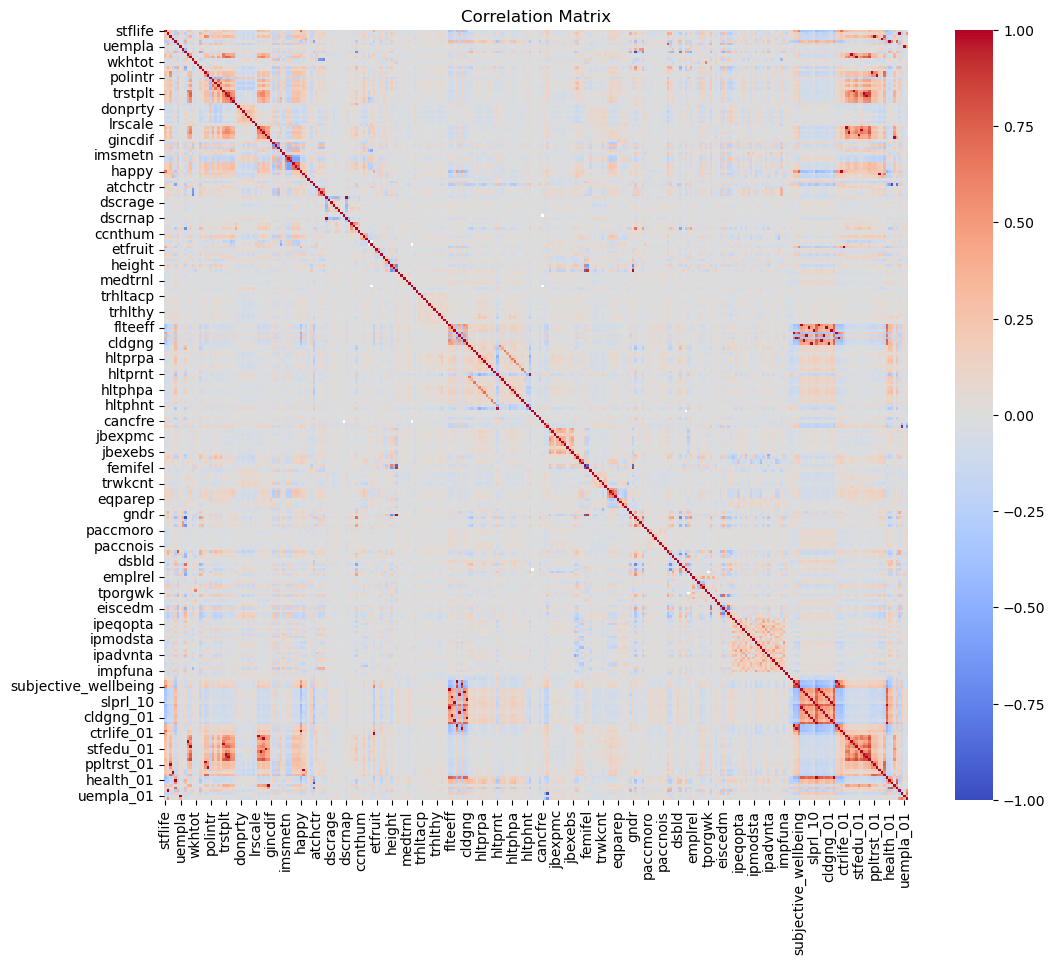

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Import numpy

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()

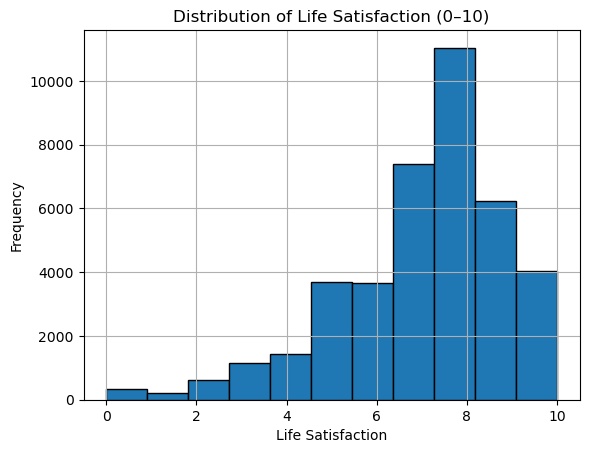

In [28]:
import matplotlib.pyplot as plt

df["stflife"].hist(bins=11, edgecolor='black')
plt.title("Distribution of Life Satisfaction (0–10)")
plt.xlabel("Life Satisfaction")
plt.ylabel("Frequency")
plt.show()


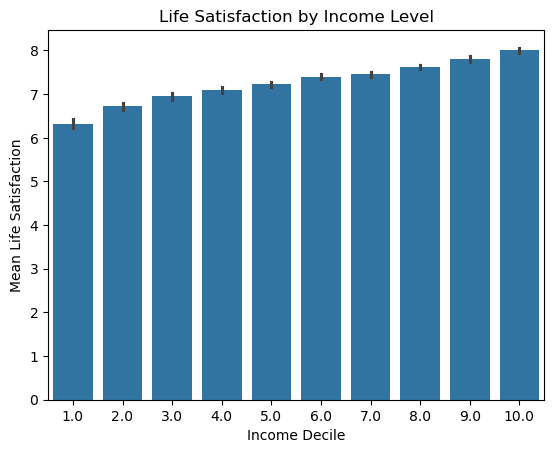

In [29]:
sns.barplot(x="hinctnta", y="stflife", data=df)
plt.title("Life Satisfaction by Income Level")
plt.xlabel("Income Decile")
plt.ylabel("Mean Life Satisfaction")
plt.show()


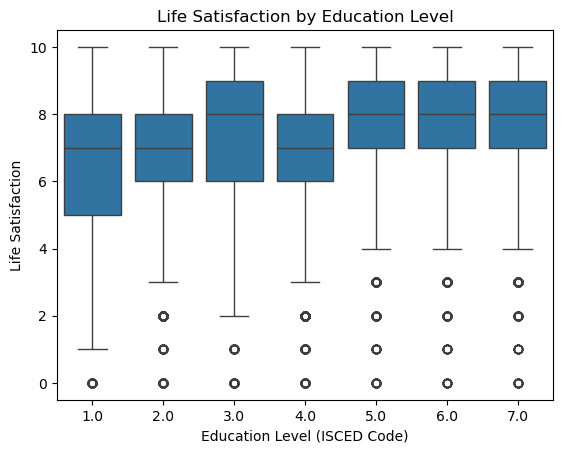

eisced
1.0    6.586136
2.0    6.963616
3.0    7.235922
4.0    7.018516
5.0    7.460535
6.0    7.474976
7.0    7.720212
Name: stflife, dtype: float64


In [30]:
sns.boxplot(x="eisced", y="stflife", data=df)
plt.title("Life Satisfaction by Education Level")
plt.xlabel("Education Level (ISCED Code)")
plt.ylabel("Life Satisfaction")
plt.show()

# Optional: mean satisfaction per group
print(df.groupby("eisced")["stflife"].mean())


In [33]:
def categorize_age_5_groups(age):
    """Categorizes age into 5 groups."""
    if age <= 29:
        return 1
    elif age <= 44:
        return 2
    elif age <= 59:
        return 3
    elif age <= 74:
        return  4
    elif age >= 75 and age <= 100:
        return 5
    else:
        return None  # Handle missing

# Assuming your age data is in a pandas DataFrame called 'df' and the age column is 'agea'
# Create a new column 'age_group_5' with the categorized ages
df['age_group'] = df['agea'].apply(categorize_age_5_groups)

# Now you can use the 'age_group_5' column for your analysis and visualizations

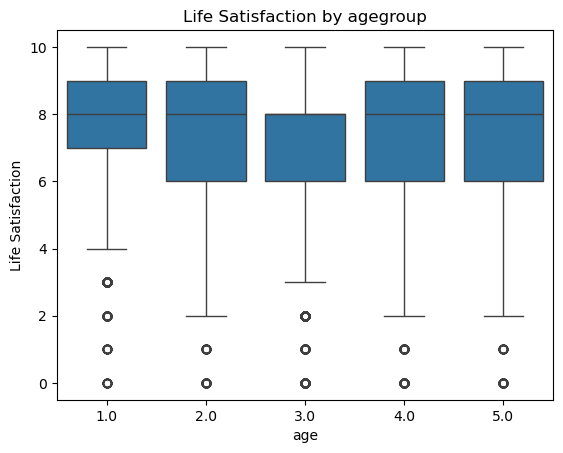

eisced
1.0    6.586136
2.0    6.963616
3.0    7.235922
4.0    7.018516
5.0    7.460535
6.0    7.474976
7.0    7.720212
Name: stflife, dtype: float64


In [39]:
sns.boxplot(x="age_group", y="stflife", data=df)
plt.title("Life Satisfaction by agegroup")
plt.xlabel("age")
plt.ylabel("Life Satisfaction")
plt.show()

# Optional: mean satisfaction per group
print(df.groupby("eisced")["stflife"].mean())


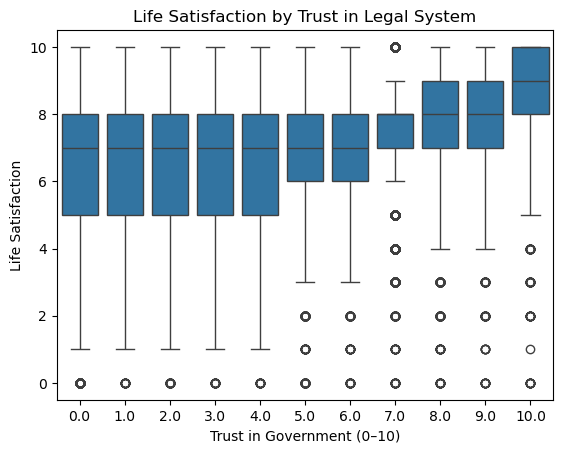

In [40]:
sns.boxplot(x="trstlgl", y="stflife", data=df)
plt.title("Life Satisfaction by Trust in Legal System")
plt.xlabel("Trust in Government (0–10)")
plt.ylabel("Life Satisfaction")
plt.show()


In [44]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols(
    formula="""
        stflife ~  + uempla + agea + gndr + eduyrs 
                + trstlgl + fltdpr + ppltrst
    """,
    data=df
).fit()


print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                stflife   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     881.9
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:10:47   Log-Likelihood:                -79042.
No. Observations:               38390   AIC:                         1.581e+05
Df Residuals:                   38384   BIC:                         1.581e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4346      0.060     90.829      0.0

In [45]:
model = smf.ols(
    formula="""
        stflife ~ hinctnta + uempla + agea + gndr 
                + C(eisced) + trstlgl + fltdpr + ppltrst
    """,
    data=df
).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                stflife   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     669.2
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:17:16   Log-Likelihood:                -60702.
No. Observations:               30712   AIC:                         1.214e+05
Df Residuals:                   30698   BIC:                         1.215e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.3951      0.078  

In [47]:
df["age_squared"] = df["agea"] ** 2

model = smf.ols(
    formula="""
        stflife ~ hinctnta + uempla + agea + age_squared + gndr 
                + C(eisced) + trstlgl + fltdpr + ppltrst
    """,
    data=df
).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                stflife   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     634.7
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:18:02   Log-Likelihood:                -60630.
No. Observations:               30712   AIC:                         1.213e+05
Df Residuals:                   30697   BIC:                         1.214e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.1234      0.098  

In [56]:
model = smf.ols(
    formula="""
        stflife ~ hinctnta + uempla + hinctnta:uempla
                + agea + age_squared + C(eisced) + gndr 
                + fltdpr + trstlgl + ppltrst + gndr:fltdpr
                + inprdsc + hlthhmp + slprl + ctrlife
    """,
    data=df
).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                stflife   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     687.4
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:33:11   Log-Likelihood:                -58330.
No. Observations:               30496   AIC:                         1.167e+05
Df Residuals:                   30475   BIC:                         1.169e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.4363      0.131  

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt

df_ = pd.read_csv('../data/year_2023_cleaned.csv')
y = df_["stflife"]

# Step 2: Select numeric features only and drop target
X = df_.drop(columns=["stflife"])
X = X.select_dtypes(include="number")

# Step 3: Impute missing values with column means
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Impute missing values in the target variable with the mean
y_imputer = SimpleImputer(strategy="mean")
y_imputed = y_imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Step 5: Fit Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Step 6: Evaluate
y_pred = rf.predict(X_test)
print("R² on test set:", round(r2_score(y_test, y_pred), 3))


R² on test set: 0.535


In [76]:
theme_vars = [
    "mental_distress",
    "subjective_wellbeing",
    "institutional_trust",
    "social_trust",
    "health_limitations",
    "economic_status",
    # "social_contact"
]

control_vars = ["agea", "gndr", "age_squared", "C(eisced)"]

# Build regression formula
formula = "stflife ~ " + " + ".join(theme_vars + control_vars)
import statsmodels.formula.api as smf

model = smf.ols(formula=formula, data=df).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                stflife   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     1887.
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:25:41   Log-Likelihood:                -72567.
No. Observations:               39338   AIC:                         1.452e+05
Df Residuals:                   39322   BIC:                         1.453e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.4904 

In [105]:
import statsmodels.api as sm
import pandas as pd

# Assuming df is already defined and includes the following theme columns and demographics
theme_columns = [
    "subjective_wellbeing", "emotional_difficulty", "institutional_trust",
    "social_trust", "economic_status", "health_limitations", "chronic_health_conditions",
    "safety_security", "political_efficacy", "discrimination", "civic_engagement",
    "values", "education"
]

demographics = ["agea", "age_squared", "gndr"]

# Drop rows with missing data in selected columns
model_data = df[theme_columns + demographics + ["stflife"]].dropna()

# Define X and y
X = model_data[theme_columns + demographics]
X = sm.add_constant(X)
y = model_data["stflife"]

# Fit OLS model
model = sm.OLS(y, X).fit()

# Summary of the model
model_summary = model.summary()
model_summary_text = model_summary.as_text()
print(model_summary_text)

                            OLS Regression Results                            
Dep. Variable:                stflife   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     1723.
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:43:10   Log-Likelihood:                -72761.
No. Observations:               39330   AIC:                         1.456e+05
Df Residuals:                   39313   BIC:                         1.457e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate the model with the best parameters
best_rf = grid_search.best_estimator_
best_rf_score = best_rf.score(X_test, y_test)
print("Test R-squared with best parameters:", best_rf_score)


In [141]:
import statsmodels.api as sm
import pandas as pd

# Assuming df is already defined and includes the following theme columns and demographics
theme_columns = [
    "subjective_wellbeing", "emotional_difficulty", "institutional_trust",
    "social_trust", "economic_status", "health_limitations", "chronic_health_conditions",
    "safety_security", "political_efficacy", "discrimination", "civic_engagement",
    "values", "education"
]

demographics = ["agea", "age_squared", "gndr"]
model_data = df[theme_columns + demographics + ["stflife"]]

# Define X and y
X = model_data[theme_columns + demographics]
X = sm.add_constant(X)
y = model_data["stflife"]

imputer_X = SimpleImputer(strategy='mean')  # Use mean imputation for numeric features
imputer_y = SimpleImputer(strategy='mean')  # Impute missing target values as well

# Fit the imputer for features (X) and target (y)
X_imputed = imputer_X.fit_transform(X)
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1))  # Ensure y is reshaped as 2D array for imputation

# Convert the imputed data back to DataFrame and Series for easier handling
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)
y_imputed_series = pd.Series(y_imputed.flatten(), name='Target')  # Flatten y to return a 1D Series

# Check for missing values to verify if imputation was successful
print("Missing values after imputation in X:")
print(X_imputed_df.isnull().sum())  # Should print 0 for all columns if imputation is successful
print("Missing values after imputation in y:")
print(y_imputed_series.isnull().sum())  # Should print 0 if no missing values are left in y

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed_df, y_imputed_series, test_size=0.2, random_state=42)

# Step 3: Define and train the RandomForestRegressor (or any model of your choice)
rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2)
rf_model.fit(X_train, y_train)

# Step 4: Evaluate the model using cross-validation (5-fold)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Print cross-validation results
print("Cross-validation scores (negative MSE):", cv_scores)
print("Average Cross-validation score:", cv_scores.mean())

# Step 5: Evaluate the model on the test set
y_pred = rf_model.predict(X_test)
test_score = rf_model.score(X_test, y_test)

print(f"Test R-squared: {test_score}")

Missing values after imputation in X:
const                        0
subjective_wellbeing         0
emotional_difficulty         0
institutional_trust          0
social_trust                 0
economic_status              0
health_limitations           0
chronic_health_conditions    0
safety_security              0
political_efficacy           0
discrimination               0
civic_engagement             0
values                       0
education                    0
agea                         0
age_squared                  0
gndr                         0
dtype: int64
Missing values after imputation in y:
0
Cross-validation scores (negative MSE): [-2.35918966 -2.24777225 -2.33770964 -2.34223812 -2.34733499]
Average Cross-validation score: -2.3268489329481996
Test R-squared: 0.40401638510177695


In [113]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Create age_squared if you haven't already
df["age_squared"] = df["agea"] ** 2

# Define your model formula
formula = "stflife ~ C(eisced) + emotional_difficulty + institutional_trust + social_trust + health_limitations + chronic_health_conditions + economic_status + civic_engagement + safety_security + political_efficacy + discrimination + values + agea + gndr + age_squared"

# Fit the model
model = smf.ols(formula=formula, data=df).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                stflife   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     743.1
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:08:55   Log-Likelihood:                -76508.
No. Observations:               39150   AIC:                         1.531e+05
Df Residuals:                   39129   BIC:                         1.532e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

c:\Users\User\anaconda3\envs\pytorch-env\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


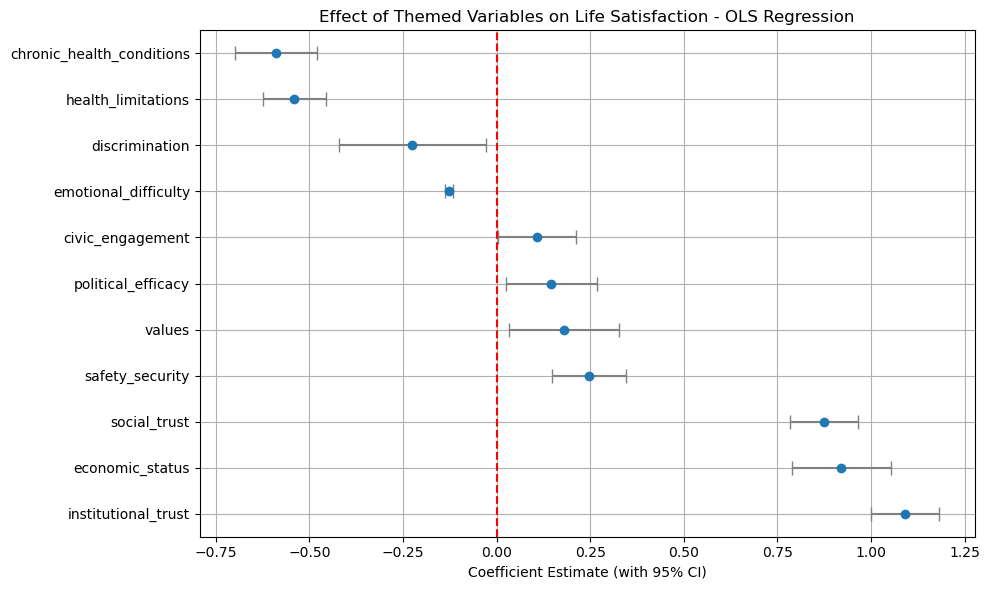

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Coefficient and confidence interval data extracted from the model summary
data = {
    "Variable": [
         "emotional_difficulty", "institutional_trust", "social_trust",
        "health_limitations", "chronic_health_conditions", "economic_status", "civic_engagement",
        "safety_security", "political_efficacy", "discrimination", "values"
    ],
    "Coefficient": [
        -0.1277, 1.0920, 0.8742,
        -0.5411, -0.5899, 0.9213, 0.1072,
        0.2474, 0.1464, -0.2248, 0.1802
    ],
    "CI Lower": [
        -0.139, 1.001, 0.783,
        -0.625, -0.699, 0.790, 0.003,
        0.148, 0.024, -0.421, 0.034
    ],
    "CI Upper": [
         -0.116, 1.183, 0.965,
        -0.457, -0.480, 1.053, 0.212,
        0.347, 0.268, -0.029, 0.326
    ]
}

df_viz = pd.DataFrame(data)
df_viz = df_viz.sort_values("Coefficient", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.errorbar(
    x=df_viz["Coefficient"], 
    y=df_viz["Variable"], 
    xerr=[df_viz["Coefficient"] - df_viz["CI Lower"], df_viz["CI Upper"] - df_viz["Coefficient"]],
    fmt='o', ecolor='grey', capsize=5
)
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel("Coefficient Estimate (with 95% CI)")
plt.title("Effect of Themed Variables on Life Satisfaction - OLS Regression")
plt.grid(True)
plt.tight_layout()
plt.show()


In [111]:
# Change reference category to 'FR'
df["cntry"] = df["cntry"].astype("category")
df["cntry"] = df["cntry"].cat.reorder_categories(
    ["GB"] + [c for c in df["cntry"].cat.categories if c != "GB"], 
    ordered=False
)

# Then rerun the regression
import statsmodels.formula.api as smf

model = smf.ols(
    "stflife ~ C(cntry) + " +
    " + ".join([
        "subjective_wellbeing", "emotional_difficulty", "institutional_trust",
        "social_trust", "health_limitations", "chronic_health_conditions",
        "economic_status", "civic_engagement", "safety_security",
        "political_efficacy", "discrimination", "values",
        "agea", "gndr", "age_squared", "C(eisced)"
    ]),
    data=df
).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                stflife   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     664.2
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:03:37   Log-Likelihood:                -71887.
No. Observations:               39150   AIC:                         1.439e+05
Df Residuals:                   39105   BIC:                         1.442e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

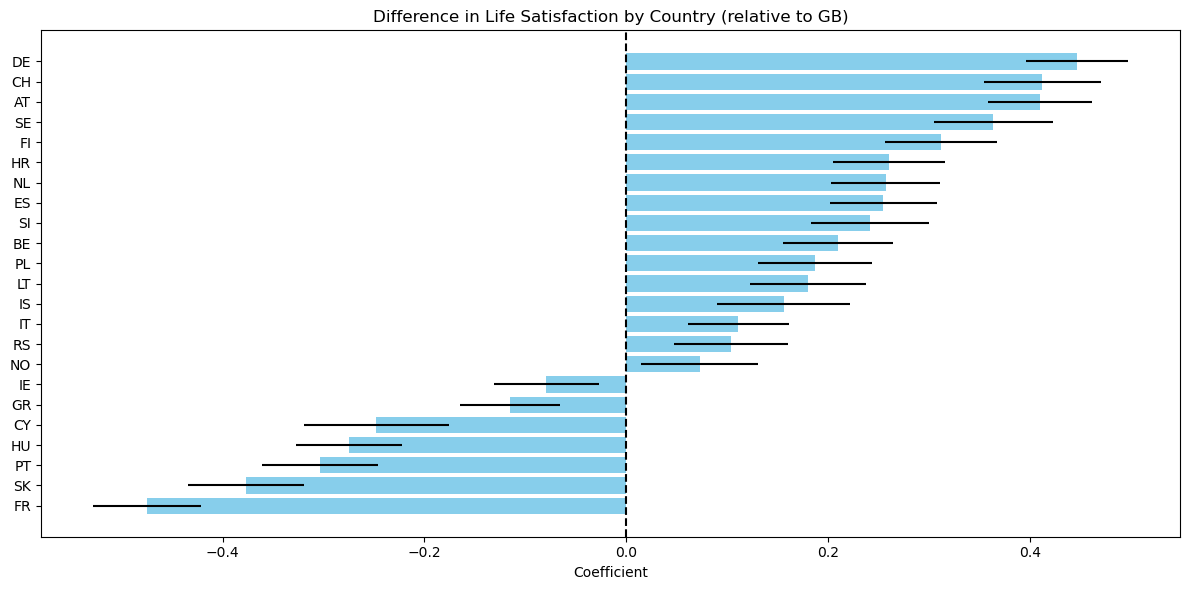

In [112]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract country coefficients
coefs = model.params.filter(like="C(cntry)")
errors = model.bse[coefs.index]

# Clean labels
country_labels = coefs.index.str.extract(r"C\(cntry\)\[T\.(.*)\]")[0]

# Combine into DataFrame
df_country_effects = pd.DataFrame({
    "country": country_labels,
    "coef": coefs.values,
    "err": errors.values
}).sort_values("coef")

# Plot
plt.figure(figsize=(12, 6))
plt.barh(df_country_effects["country"], df_country_effects["coef"], xerr=df_country_effects["err"], color="skyblue")
plt.axvline(0, color="black", linestyle="--")
plt.title("Difference in Life Satisfaction by Country (relative to GB)")
plt.xlabel("Coefficient")
plt.tight_layout()
plt.show()


In [115]:
# Create interaction term between subjective wellbeing and age
X['subjective_wellbeing_age'] = X['subjective_wellbeing'] * X['agea']

# Run the model with interaction term
model_with_interaction = sm.OLS(y, sm.add_constant(X)).fit()

# Check if interaction term is significant
print(model_with_interaction.summary())



                            OLS Regression Results                            
Dep. Variable:                stflife   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     1622.
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:16:41   Log-Likelihood:                -72761.
No. Observations:               39330   AIC:                         1.456e+05
Df Residuals:                   39312   BIC:                         1.457e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [116]:
from sklearn.linear_model import Lasso

# Prepare X and y
X_train = X.values
y_train = y.values

# Initialize Lasso model with alpha value (regularization strength)
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# Get coefficients
print("Lasso coefficients:", lasso.coef_)

# Predict and evaluate
y_pred = lasso.predict(X_train)


Lasso coefficients: [ 0.00000000e+00  2.50574693e+00 -1.57117539e-01  1.07563396e+00
  7.42580920e-01  5.39438445e-01 -1.99237497e-01 -9.45419777e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.72132217e-02  2.73456295e-04
  5.63980530e-02  4.74111802e-02]


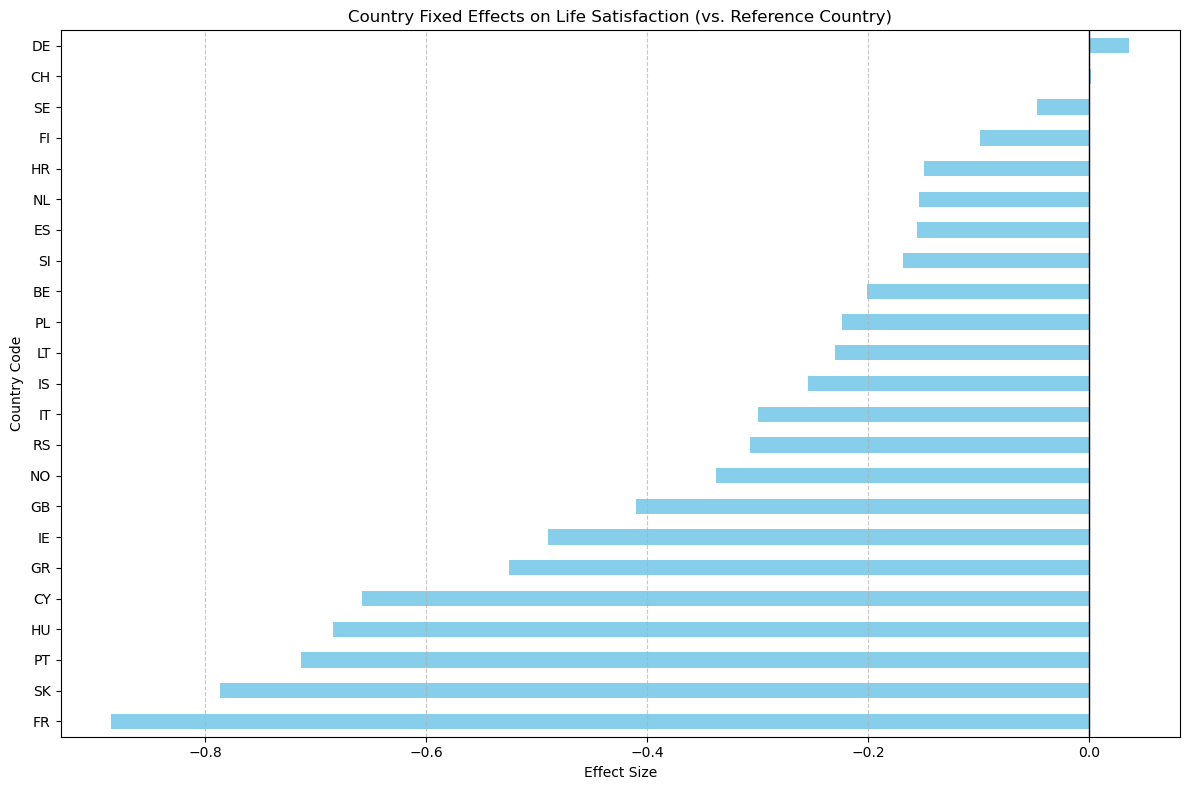

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Manually inputting the country coefficients from the regression output
country_effects = {
    "BE": -0.2006,
    "CH": 0.0022,
    "CY": -0.6578,
    "DE": 0.0366,
    "ES": -0.1554,
    "FI": -0.0985,
    "FR": -0.8852,
    "GB": -0.4100,
    "GR": -0.5251,
    "HR": -0.1495,
    "HU": -0.6845,
    "IE": -0.4895,
    "IS": -0.2541,
    "IT": -0.2992,
    "LT": -0.2299,
    "NL": -0.1533,
    "NO": -0.3374,
    "PL": -0.2231,
    "PT": -0.7136,
    "RS": -0.3064,
    "SE": -0.0466,
    "SI": -0.1686,
    "SK": -0.7867
}

# Create a DataFrame for easier plotting
country_df = pd.DataFrame.from_dict(country_effects, orient='index', columns=['Life Satisfaction Effect'])
country_df = country_df.sort_values(by='Life Satisfaction Effect', ascending=True)

# Plot
plt.figure(figsize=(12, 8))
country_df['Life Satisfaction Effect'].plot(kind='barh', color='skyblue')
plt.axvline(0, color='black', linewidth=1)
plt.title('Country Fixed Effects on Life Satisfaction (vs. Reference Country)')
plt.xlabel('Effect Size')
plt.ylabel('Country Code')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [117]:
import statsmodels.api as sm
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Step 1: Backward elimination using AIC
def backward_elimination(X, y, significance_level=0.05):
    X = sm.add_constant(X)  # Add constant term to the model
    model = sm.OLS(y, X).fit()
    while True:
        max_p_value = model.pvalues.max()  # Find the highest p-value
        if max_p_value > significance_level:
            excluded_variable = model.pvalues.idxmax()
            X = X.drop(columns=[excluded_variable])
            model = sm.OLS(y, X).fit()
        else:
            break
    return model.summary()

# Step 2: Run the model with backward elimination
summary = backward_elimination(X, y)
print(summary)


                            OLS Regression Results                            
Dep. Variable:                stflife   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     2120.
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:24:26   Log-Likelihood:                -72765.
No. Observations:               39330   AIC:                         1.456e+05
Df Residuals:                   39316   BIC:                         1.457e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [118]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Perform k-fold cross-validation with 5 folds
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())


Cross-validation scores: [-1.96398466 -2.5132271  -2.72013503 -2.02283769 -2.72388377]
Average cross-validation score: -2.3888136472336785


In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Define your independent variables (X) and dependent variable (y)
X = df[["subjective_wellbeing", "emotional_difficulty", "institutional_trust", "social_trust", 
        "health_limitations", "chronic_health_conditions", "economic_status", "civic_engagement", 
        "safety_security", "political_efficacy", "discrimination", "values", "agea", "gndr", "age_squared"]]
y = df["stflife"]

# Replace missing values in y with the mean
y = y.fillna(y.mean())

# Create a pipeline with mean imputation and linear regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('model', LinearRegression())
])

# Cross-validation using KFold (default 5 folds)
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Print the results
print(f"Cross-validation scores (negative MSE): {cv_scores}")
print(f"Average Cross-validation score: {np.mean(cv_scores)}")

Cross-validation scores (negative MSE): [-1.98254564 -2.51785037 -2.7164922  -2.03871137 -2.73219263]
Average Cross-validation score: -2.39755844223226


In [125]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Define your independent variables (X) and dependent variable (y)
X = df[["subjective_wellbeing", "emotional_difficulty", "institutional_trust", "social_trust", 
        "health_limitations", "chronic_health_conditions", "economic_status", "civic_engagement", 
        "safety_security", "political_efficacy", "discrimination", "values", "agea", "gndr", "age_squared"]]
y = df["stflife"]

# Replace missing values in X with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Replace missing values in y with the mean
y = y.fillna(y.mean())

# Stepwise Regression (Backward Elimination)
def backward_elimination(X, y, significance_level=0.05):
    X_with_intercept = sm.add_constant(X)  # Add intercept
    model = sm.OLS(y, X_with_intercept).fit()  # Fit the model
    
    while True:
        # Get p-values for all predictors
        p_values = model.pvalues
        max_p_value = p_values.max()
        
        # Check if the largest p-value is greater than the significance level
        if max_p_value > significance_level:
            # Find the feature with the highest p-value and drop it
            max_p_value_feature = p_values.idxmax()
            print(f"Dropping feature: {max_p_value_feature} with p-value {max_p_value}")
            
            X_with_intercept = X_with_intercept.drop(columns=[max_p_value_feature])  # Drop the feature
            model = sm.OLS(y, X_with_intercept).fit()  # Refit the model
        else:
            break
    
    return model

# Apply the backward elimination to your dataset
model = backward_elimination(X_imputed, y)

# Print the summary of the final model
print(model.summary())

Dropping feature: civic_engagement with p-value 0.09186874633048782
Dropping feature: discrimination with p-value 0.06264024998315591
                            OLS Regression Results                            
Dep. Variable:                stflife   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     2123.
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:31:30   Log-Likelihood:                -74376.
No. Observations:               40156   AIC:                         1.488e+05
Df Residuals:                   40142   BIC:                         1.489e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [

In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

rf_model = RandomForestRegressor()
rf_model.fit(X, y)

importance = rf_model.feature_importances_
indices = importance.argsort()[::-1]

plt.figure(figsize=(12,8))
plt.barh(range(len(importance)), importance[indices], align="center")
plt.yticks(range(len(importance)), [X.columns[i] for i in indices])
plt.title("Feature Importance")
plt.show()


In [ ]:
import seaborn as sns

# Fit the model and get predictions
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, color="blue", line_kws={'color': 'red', 'lw': 1})
plt.title("Residual Plot")
plt.show()


In [132]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
import pandas as pd

# Define your independent variables (X) and dependent variable (y)
X = df[["subjective_wellbeing", "emotional_difficulty", "institutional_trust", "social_trust", 
        "health_limitations", "chronic_health_conditions", "economic_status", "civic_engagement", 
        "safety_security", "political_efficacy", "discrimination", "values", "agea", "gndr", "age_squared"]]
y = df["stflife"]

# Replace missing values in X with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Replace missing values in y with the mean
y = y.fillna(y.mean())

# Create Ridge regression model
ridge_model = Ridge()

# Perform cross-validation using the imputed feature matrix
ridge_scores = cross_val_score(ridge_model, X_imputed, y, cv=5, scoring='neg_mean_squared_error')

# Print the results
print(f"Ridge Regression Cross-validation scores: {ridge_scores}")
print(f"Average Ridge Regression score: {ridge_scores.mean()}")


from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

lasso_model = Lasso()
lasso_scores = cross_val_score(lasso_model, X_imputed, y, cv=5, scoring='neg_mean_squared_error')
print(f"Lasso Regression Cross-validation scores: {lasso_scores}")
print(f"Average Lasso Regression score: {lasso_scores.mean()}")





Ridge Regression Cross-validation scores: [-1.98240284 -2.51795702 -2.71657538 -2.03853897 -2.73222681]
Average Ridge Regression score: -2.397540205385938
Lasso Regression Cross-validation scores: [-3.26800324 -3.84227188 -3.98489141 -3.14338305 -4.23533647]
Average Lasso Regression score: -3.694777211857885


In [135]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf_model = RandomForestRegressor(n_estimators=100)
rf_scores = cross_val_score(rf_model, X_imputed, y, cv=5, scoring='neg_mean_squared_error')
print(f"Random Forest Regression Cross-validation scores: {rf_scores}")
print(f"Average Random Forest score: {rf_scores.mean()}")


Random Forest Regression Cross-validation scores: [-2.03408253 -2.47578157 -2.70216974 -2.06379202 -2.72815929]
Average Random Forest score: -2.400797028045978


In [133]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

gb_model = GradientBoostingRegressor()
gb_scores = cross_val_score(gb_model, X_imputed, y, cv=5, scoring='neg_mean_squared_error')
print(f"Gradient Boosting Regression Cross-validation scores: {gb_scores}")
print(f"Average Gradient Boosting score: {gb_scores.mean()}")


Gradient Boosting Regression Cross-validation scores: [-1.93895385 -2.4834268  -2.67425432 -2.00907541 -2.70434162]
Average Gradient Boosting score: -2.362010399343114


In [134]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

xgb_model = XGBRegressor()
xgb_scores = cross_val_score(xgb_model, X_imputed, y, cv=5, scoring='neg_mean_squared_error')
print(f"XGBoost Regression Cross-validation scores: {xgb_scores}")
print(f"Average XGBoost score: {xgb_scores.mean()}")


ModuleNotFoundError: No module named 'xgboost'

In [137]:
models = ['Ridge', 'Lasso', 'Random Forest', 'Gradient Boosting']
scores = [ridge_scores.mean(), lasso_scores.mean(), rf_scores.mean(), gb_scores.mean()]

# Create a simple comparison
for model, score in zip(models, scores):
    print(f"{model} Average Score: {score}")


Ridge Average Score: -2.397540205385938
Lasso Average Score: -3.694777211857885
Random Forest Average Score: -2.400797028045978
Gradient Boosting Average Score: -2.362010399343114


In [73]:
df

,cntry,stflife,hinctnta,ppltrst,sclmeet,health,eduyrs,uempla,marsts,agea,...,hlthhmp_01,stfhlth_01,health_limitations,hinctnta_01,fnsdfml_01,uempla_01,economic_status,age_group,age_squared,predicted
0,AT,8.0,6.0,5.0,4.0,3,12.0,0,NaN,65.0,...,0.0,0.8,0.433333,0.6,0.00,0,0.200000,4.0,4225.0,8.177457
1,AT,9.0,1.0,10.0,7.0,2,14.0,0,6.0,21.0,...,0.5,1.0,0.583333,0.1,0.25,0,0.116667,1.0,441.0,7.067829
2,AT,10.0,5.0,6.0,4.0,1,16.0,0,NaN,53.0,...,0.0,0.8,0.266667,0.5,0.75,0,0.416667,3.0,2809.0,6.785516
3,AT,7.0,2.0,6.0,6.0,3,14.0,0,4.0,78.0,...,0.0,0.2,0.233333,0.2,0.50,0,0.233333,5.0,6084.0,6.772579
4,AT,9.0,NaN,6.0,5.0,2,12.0,0,NaN,64.0,...,0.0,0.9,0.383333,NaN,0.00,0,0.000000,4.0,4096.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40151,SK,5.0,5.0,5.0,6.0,2,NaN,0,6.0,18.0,...,0.0,0.2,0.150000,0.5,0.50,0,0.333333,1.0,324.0,5.509205
40152,SK,10.0,7.0,7.0,4.0,2,14.0,0,NaN,56.0,...,0.5,1.0,0.583333,0.7,0.25,0,0.316667,3.0,3136.0,6.030832
40153,SK,10.0,10.0,5.0,6.0,2,17.0,0,NaN,31.0,...,0.0,0.4,0.216667,1.0,0.00,0,0.333333,2.0,961.0,7.851536
40154,SK,8.0,NaN,0.0,7.0,1,8.0,0,6.0,15.0,...,0.0,0.3,0.100000,NaN,0.25,0,0.125000,1.0,225.0,NaN


In [72]:
# Get column names after imputation
feature_names = X.columns

# Create importances DataFrame
importances = pd.Series(rf.feature_importances_, index=feature_names)
importances = importances.sort_values(ascending=False)

# Print top 25
print(importances.head(30))


happy       0.464538
stfeco      0.028475
ctrlife     0.018089
stfdem      0.008767
trstplc     0.007952
weighta     0.007080
height      0.006869
nwspol      0.006192
wrhpp       0.006151
stfhlth     0.006073
pplfair     0.006071
fltdpr      0.005893
stfedu      0.005804
lrscale     0.005767
wkhtot      0.005736
pplhlp      0.005585
ppltrst     0.005550
netustm     0.005525
eduyrs      0.005344
wkhct       0.005308
trstlgl     0.005261
stfgov      0.005041
pdjobyr     0.004942
enjlf       0.004812
eqpaybg     0.004732
wkdcorga    0.004480
euftf       0.004456
sclmeet     0.004279
imbgeco     0.004172
hinctnta    0.004172
dtype: float64


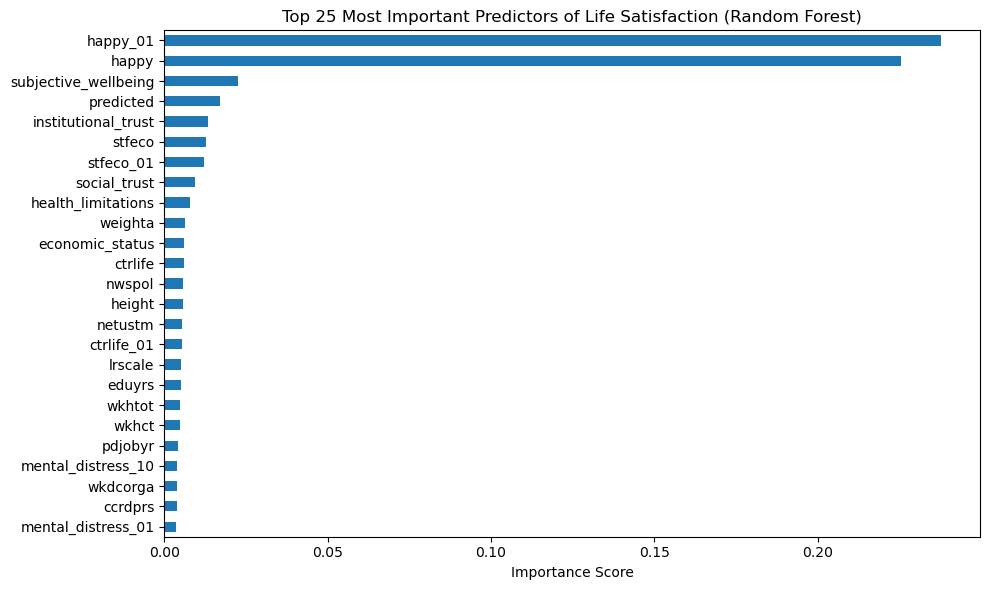

In [67]:
plt.figure(figsize=(10, 6))
importances.head(25).plot(kind="barh")
plt.title("Top 25 Most Important Predictors of Life Satisfaction (Random Forest)")
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


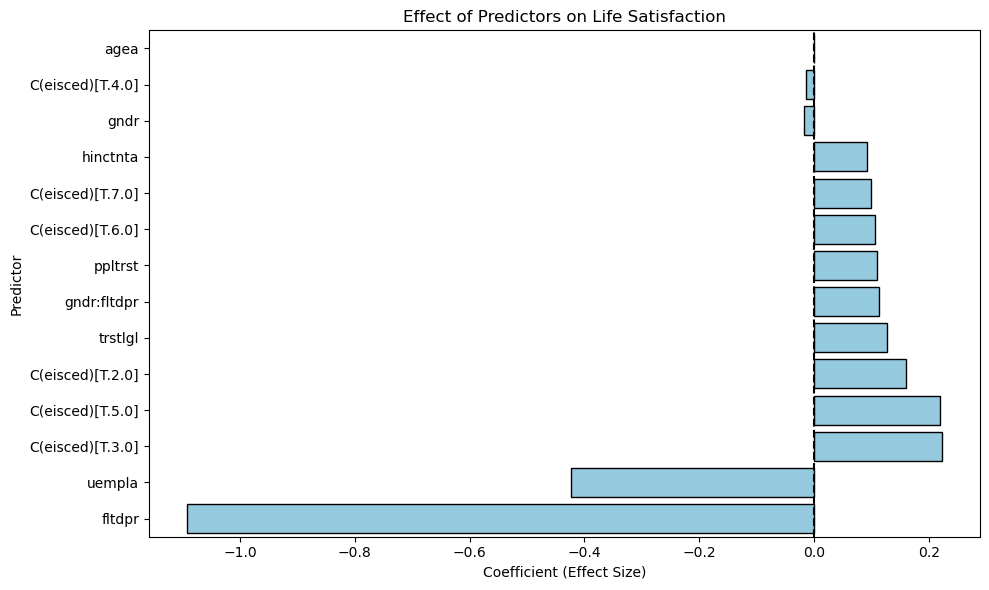

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get coefficients and CIs
coefs = model.params
conf = model.conf_int()
conf.columns = ['lower', 'upper']
coef_df = coefs.to_frame(name='coef').join(conf)

# Drop intercept, sort by size
coef_df = coef_df.drop('Intercept').sort_values('coef', key=abs, ascending=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='coef', y=coef_df.index, data=coef_df, orient='h', color='skyblue', edgecolor='black')
plt.axvline(0, color='black', linestyle='--')
plt.title('Effect of Predictors on Life Satisfaction')
plt.xlabel('Coefficient (Effect Size)')
plt.ylabel('Predictor')
plt.tight_layout()
plt.show()


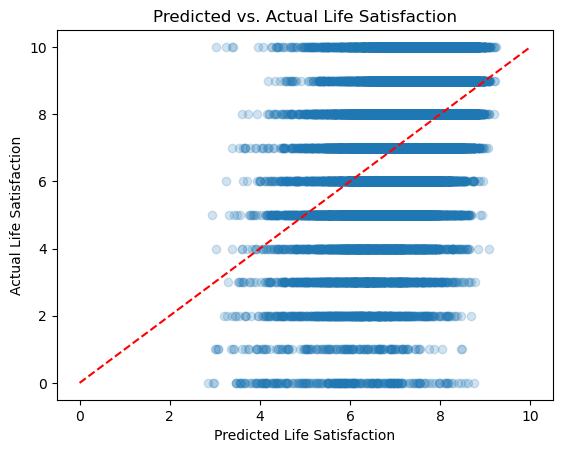

In [51]:
import matplotlib.pyplot as plt

df["predicted"] = model.fittedvalues

plt.scatter(df["predicted"], df["stflife"], alpha=0.2)
plt.xlabel("Predicted Life Satisfaction")
plt.ylabel("Actual Life Satisfaction")
plt.title("Predicted vs. Actual Life Satisfaction")
plt.plot([0, 10], [0, 10], color='red', linestyle='--')
plt.show()


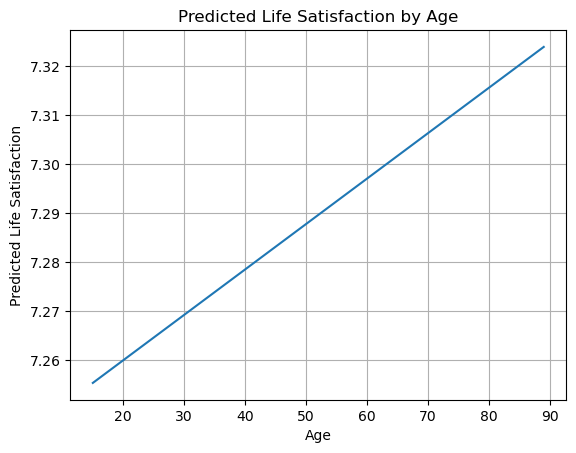

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of age values
age_vals = np.arange(15, 90)

# Create prediction DataFrame with average values for all other variables
predict_df = pd.DataFrame({
    "agea": age_vals,
    "age_squared": age_vals**2,
    "hinctnta": df["hinctnta"].mean(),
    "uempla": 0,
    "gndr": 1,
    "eisced": 3,
    "fltdpr": df["fltdpr"].mean(),
    "trstlgl": df["trstlgl"].mean(),
    "ppltrst": df["ppltrst"].mean(),
    "gndr:fltdpr": 1 * df["fltdpr"].mean()
})

# Predict life satisfaction
predicted_life_satisfaction = model.predict(predict_df)

# Plot
plt.plot(age_vals, predicted_life_satisfaction)
plt.xlabel("Age")
plt.ylabel("Predicted Life Satisfaction")
plt.title("Predicted Life Satisfaction by Age")
plt.grid(True)
plt.show()


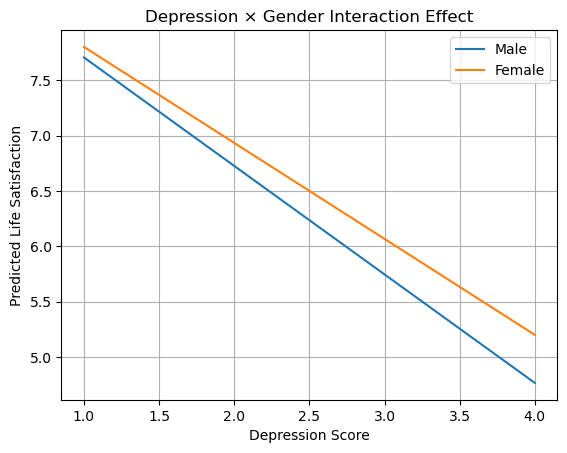

In [54]:
# Depression score range
depr_vals = np.linspace(df["fltdpr"].min(), df["fltdpr"].max(), 100)

# Set up shared values
base_vals = {
    "hinctnta": df["hinctnta"].mean(),
    "uempla": 0,
    "agea": df["agea"].mean(),
    "age_squared": df["agea"].mean() ** 2,
    "eisced": 3,
    "trstlgl": df["trstlgl"].mean(),
    "ppltrst": df["ppltrst"].mean()
}

# Predictions for males
male_df = pd.DataFrame({
    **base_vals,
    "gndr": 1,
    "fltdpr": depr_vals,
    "gndr:fltdpr": 1 * depr_vals
})
male_preds = model.predict(male_df)

# Predictions for females
female_df = pd.DataFrame({
    **base_vals,
    "gndr": 2,
    "fltdpr": depr_vals,
    "gndr:fltdpr": 2 * depr_vals
})
female_preds = model.predict(female_df)

# Plot
plt.plot(depr_vals, male_preds, label="Male")
plt.plot(depr_vals, female_preds, label="Female")
plt.xlabel("Depression Score")
plt.ylabel("Predicted Life Satisfaction")
plt.title("Depression × Gender Interaction Effect")
plt.legend()
plt.grid(True)
plt.show()


In [18]:
print(len(columns_of_interest))

139


In [9]:
import pandas as pd
casuality = pd.read_csv('causality_global_map.csv')
filtered_causality = casuality[casuality['causality_to'] == 'stflife'].sort_values('weight', ascending=False)
print(filtered_causality.head(30))

columns_of_interest = casuality['causality_to'].unique()

# Convert to a list (optional)
columns_of_interest = list(columns_of_interest)

# Print the list of columns of interest
print("Columns of Interest:", columns_of_interest)

import json

# Save the list of columns of interest to a JSON file
with open('columns_of_interest.json', 'w') as json_file:
    json.dump(columns_of_interest, json_file, indent=4)

     causality_from causality_to    weight
40          iorgact      stflife  0.251621
41           nacer2      stflife  0.250986
124          mnactp      stflife  0.224126
163         trstplt      stflife  0.217172
236         occf14b      stflife  0.208393
252         uemp12m      stflife  0.207054
401         emprf14      stflife  0.190092
450         pplfair      stflife  0.186301
562           rtrdp      stflife  0.179273
569          sclact      stflife  0.178966
593         crpdwkp      stflife  0.178218
696          trstep      stflife  0.172794
759           estsz      stflife  0.170132
794         mainact      stflife  0.168416
826         trstprl      stflife  0.166842
840          marsts      stflife  0.166291
985         imbgeco      stflife  0.160655
1006         rlgdnm      stflife  0.159918
1189         edctnp      stflife  0.153442
1271        dscroth      stflife  0.150748
1347        occm14b      stflife  0.148170
1381        uemp5yr      stflife  0.147344
1405       

In [17]:
filtered_causality = casuality[casuality['causality_to'] == 'stflife'].sort_values('weight', ascending=False)

# Get the top 30 rows
top_30_causality = filtered_causality.head(30)

# Add descriptions from cleaning.json
top_30_with_descriptions = []
for _, row in top_30_causality.iterrows():
    column_name = row['causality_from']
    description = cleaning_data['variables'].get(column_name, {}).get('description', 'No description available')
    top_30_with_descriptions.append({
        'name': column_name,
        'description': description,
        'weight': row['weight']
    })

# Save the top 30 rows with descriptions to a JSON file
with open('top_30_causality_with_descriptions.json', 'w') as json_file:
    json.dump(top_30_with_descriptions, json_file, indent=4)

print("Top 30 rows with descriptions saved to 'top_30_causality_with_descriptions.json'")

Top 30 rows with descriptions saved to 'top_30_causality_with_descriptions.json'


In [11]:
df = pd.read_csv('../data/year_2023.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_22724\2654222474.py:1: DtypeWarning: Columns (630) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/year_2023.csv')


In [14]:
import numpy as np
with open('cleaning.json', 'r') as f:
    cleaning_data = json.load(f)

# Load the columns of interest
with open('columns_of_interest.json', 'r') as f:
    columns_of_interest = json.load(f)

# Iterate through the columns of interest
for column in columns_of_interest:
    # Check if the column exists in the cleaning.json file
    if column in cleaning_data['variables']:
        # Extract the description and codelist
        variable_info = cleaning_data['variables'][column]
        description = variable_info.get('description', 'No description available')
        codelist = variable_info.get('codelist', {})
        
        # Identify invalid responses (values marked with '*')
        invalid_responses = [key for key, value in codelist.items() if '*' in value]
        
        # Replace invalid responses with NaN in the DataFrame
        if column in df.columns:
            df[column] = df[column].replace(invalid_responses, np.nan)
        
        # Print the description for reference (optional)
        print(f"Processed column: {column}")
        print(f"Description: {description}")
        print(f"Invalid responses replaced: {invalid_responses}")
    else:
        print(f"Column {column} not found in cleaning.json")

# Save the cleaned DataFrame to a new file (optional)
df.to_csv('cleaned_data.csv', index=False)

Processed column: stfgov
Description: How satisfied with the national government
Invalid responses replaced: ['77', '88', '99']
Processed column: eiscedp
Description: Partner's highest level of education, ES - ISCED
Invalid responses replaced: ['66', '77', '88', '99']
Processed column: sclmeet
Description: How often socially meet with friends, relatives or colleagues
Invalid responses replaced: ['77', '88', '99']
Processed column: mainact
Description: Main activity last 7 days
Invalid responses replaced: ['66', '77', '88', '99']
Processed column: dscrdsb
Description: Discrimination of respondent's group: disability
Invalid responses replaced: []
Processed column: uemp5yr
Description: Any period of unemployment and work seeking within last 5 years
Invalid responses replaced: ['6', '7', '8', '9']
Processed column: stfedu
Description: State of education in country nowadays
Invalid responses replaced: ['77', '88', '99']
Processed column: dscroth
Description: Discrimination of respondent's 

In [15]:
cleaned_data

NameError: name 'cleaned_data' is not defined

In [16]:
import json

# Dictionary to store column descriptions
column_descriptions = {}

# Iterate through the columns of interest
for column in columns_of_interest:
    # Check if the column exists in the cleaning.json file
    if column in cleaning_data['variables']:
        # Extract the description
        description = cleaning_data['variables'][column].get('description', 'No description available')
        # Add to the dictionary
        column_descriptions[column] = description
    else:
        # If the column is not found, add a placeholder
        column_descriptions[column] = 'Description not found in cleaning.json'

# Save the column descriptions to a new JSON file
with open('casuality_column_descriptions.json', 'w') as json_file:
    json.dump(column_descriptions, json_file, indent=4)

print("Column descriptions saved to column_descriptions.json")

Column descriptions saved to column_descriptions.json
